In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Main/maldev.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/endev.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/devimage.txt') as file:
    val_images = file.read().split('\n')


In [ ]:
len(val_images)

999

In [ ]:
len(mal_txt)

999

In [ ]:
eng_txt.pop()

''

In [ ]:
eng_txt[-1]

'\t\t\t\t\t\t'

In [ ]:
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/val/"+s)

In [ ]:
len(train_images)

8931

In [ ]:
len(img_path)

999

/content/drive/My Drive/Main/val/724.jpg
mal:നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര	
eng:four legged steel chair on ground						


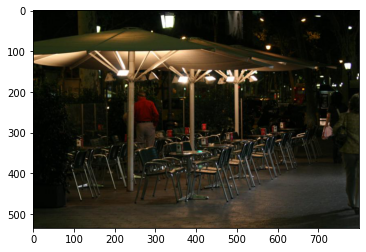

In [ ]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[3])
print("mal:"+mal_txt[3])
print("eng:"+eng_txt[3])

/content/drive/My Drive/Main/val/388.jpg
mal:ഡ്രോയറുകളുള്ള ഇരുണ്ട ചാരനിറത്തിലുള്ള കമ്പ്യൂട്ടർ ഡെസ്ക്.	
eng:A dark grey computer desk with drawers.						


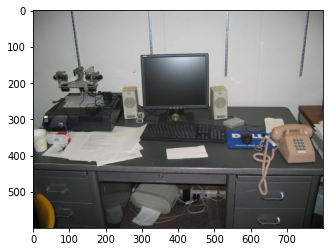

In [ ]:
im=mp.imread(img_path[2])
plt.imshow(im)
print(img_path[2])
print("mal:"+mal_txt[2])
print("eng:"+eng_txt[2])

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/My Drive/Main/devcrop1.csv')
print(df)

       X    Y    W    H
0     36   33   73   57
1    486  266   41   50
2      5  219  792  377
3    364  320  152  171
4     73  402  108  156
..   ...  ...  ...  ...
993   42  153  220  161
994  131  454   45   44
995   30  106  445  128
996  316  252   53   46
997   14  339   38  156

[998 rows x 4 columns]


In [ ]:
#Xi=df['X'].values[0]
#print(type(Xi))

<class 'numpy.int64'>


In [ ]:
'''
for i in range(len(dfnew)):
    temp=mp.imread(img_path[i])
    cropped_image = im[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
#cv2.imwrite('contour1.png', cropped_image)
'''

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

In [ ]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
tf.keras.utils.plot_model(
    modelvgg,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

NameError: ignored

In [ ]:
dfnew=df[20001:]

In [ ]:
len(df)

998

In [ ]:
dfnew

,X,Y,W,H
20001,71,122,235,340
20002,0,253,130,53
20003,83,40,364,290
20004,197,123,90,75
20005,98,131,163,185
...,...,...,...,...
28925,63,90,363,335
28926,47,81,282,393
28927,331,71,117,57
28928,273,34,211,165


In [ ]:
import cv2

In [ ]:
img_path[1]

'/content/drive/My Drive/Main/trainimages/train/2382891.jpg'

In [ ]:
splits=len(df)
dfnew=df
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    X=dfnew['X'].values[i]
    Y=dfnew['Y'].values[i]
    W=dfnew['W'].values[i]
    H=dfnew['H'].values[i]
    temp = temp[Y:Y+H, X:X+W]
    if (len(temp.shape)==3):
      try:
         temp=cv2.resize(temp,(224,224))
         imagedata[i]=temp
      except:
        break
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
imagedata[1]

array([[[0.706 , 0.5527, 0.4863],
        [0.706 , 0.5527, 0.4863],
        [0.706 , 0.5527, 0.4863],
        ...,
        [0.949 , 0.855 , 0.8394],
        [0.949 , 0.855 , 0.8394],
        [0.949 , 0.855 , 0.8394]],

       [[0.706 , 0.5527, 0.4863],
        [0.706 , 0.5527, 0.4863],
        [0.706 , 0.5527, 0.4863],
        ...,
        [0.949 , 0.855 , 0.8394],
        [0.949 , 0.855 , 0.8394],
        [0.949 , 0.855 , 0.8394]],

       [[0.702 , 0.5527, 0.4863],
        [0.702 , 0.5527, 0.4863],
        [0.702 , 0.5527, 0.4863],
        ...,
        [0.9414, 0.851 , 0.8354],
        [0.9414, 0.851 , 0.8354],
        [0.9414, 0.851 , 0.8354]],

       ...,

       [[0.4666, 0.4666, 0.4275],
        [0.4666, 0.4666, 0.4275],
        [0.4666, 0.4666, 0.4275],
        ...,
        [0.498 , 0.4666, 0.4587],
        [0.498 , 0.4666, 0.4587],
        [0.498 , 0.4666, 0.4587]],

       [[0.4666, 0.4666, 0.4275],
        [0.4666, 0.4666, 0.4275],
        [0.4666, 0.4666, 0.4275],
        .

/content/drive/My Drive/Main/val/144.jpg
mal:തെളിഞ്ഞ നീലാകാശം	
eng:a cloudy blue sky						


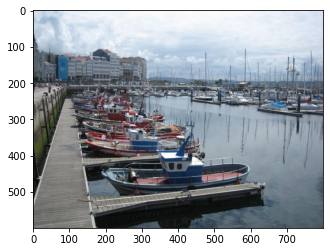

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[0])
print("eng:"+eng_txt[0])

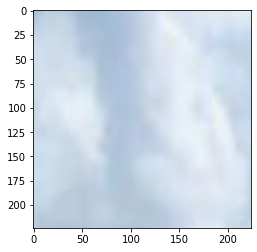

In [ ]:
plt.imshow(imagedata[0].astype(np.float32))


/content/drive/My Drive/Main/val/202.jpg
mal:ഒരു കെട്ടിടത്തിന്റെ വിൻഡോ	
eng:window of a building						


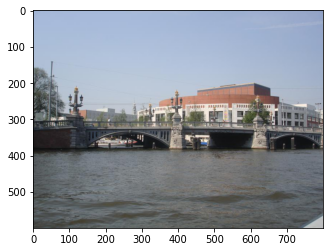

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[1])
print("eng:"+eng_txt[1])

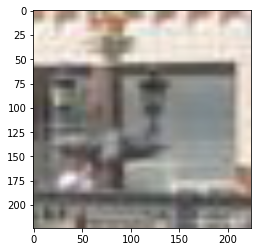

In [ ]:
plt.imshow(imagedata[1].astype(np.float32))

/content/drive/My Drive/Main/val/724.jpg
mal:നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര	
eng:four legged steel chair on ground						


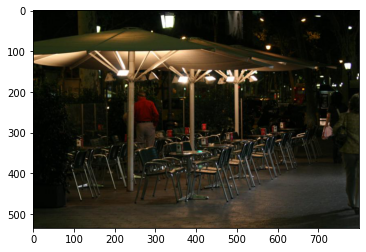

In [ ]:
im=mp.imread(img_path[3])
plt.imshow(im)
print(img_path[3])
print("mal:"+mal_txt[3])
print("eng:"+eng_txt[3])

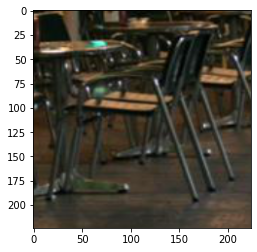

In [ ]:
plt.imshow(imagedata[3].astype(np.float32))

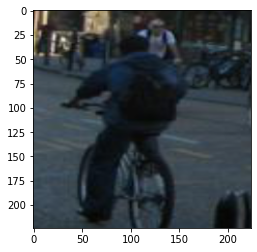

In [ ]:
plt.imshow(imagedata[4].astype(np.float32))

/content/drive/My Drive/Main/val/728.jpg
mal:തെരുവിൽ സൈക്കിൾ ചവിട്ടുന്ന മനുഷ്യൻ	
eng:Man riding a bicycle down a street						


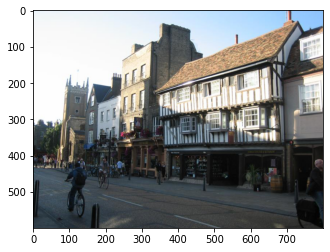

In [ ]:
im=mp.imread(img_path[4])
plt.imshow(im)
print(img_path[4])
print("mal:"+mal_txt[4])
print("eng:"+eng_txt[4])

/content/drive/My Drive/Main/trainimages/train/2382891.jpg
mal:ഒരു പുല്ലിന്റെ ഭാഗം
eng:part of a grass						


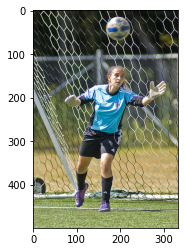

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[10002])
print("eng:"+eng_txt[10002])

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas1.txt', 'w') as writefile:
    writefile.write("imagedata")

In [ ]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/val/144.jpg
200 /content/drive/My Drive/Main/val/2327463.jpg
400 /content/drive/My Drive/Main/val/2350279.jpg
600 /content/drive/My Drive/Main/val/2372876.jpg
800 /content/drive/My Drive/Main/val/2395387.jpg


In [ ]:
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]

In [ ]:
import numpy as np

In [ ]:
save('/content/drive/My Drive/Main/valfeature.npy', vgg_feature)

In [ ]:
save('/content/drive/My Drive/Main/valdata.npy', imagedata)